In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import torch.nn.functional as F
from torch import nn
from torch import optim
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader,TensorDataset,SubsetRandomSampler
from sklearn.metrics import balanced_accuracy_score,f1_score
import scanpy as sc
import anndata
import seaborn as sns
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white') 

In [7]:
humdata = np.load('../3/5 x_hum_0902_anno_nn.npz', allow_pickle=True)
humnmf = pd.read_pickle('../3/6 Ws_hum_0902')
x_hum = torch.from_numpy(humnmf[1]).float()
y_hum = torch.from_numpy(humdata['y'].astype(np.int32))
y_hum = y_hum.long() - 1

moudata = np.load('../3/5 x_mou_0902_anno_nn.npz', allow_pickle=True)
mounmf = pd.read_pickle('../3/6 Ws_mou_0902')
x_mou = torch.from_numpy(mounmf[1]).float()
y_mou = torch.from_numpy(moudata['y'].astype(np.int32))
y_mou = y_mou.long() - 1

inputSize = x_mou.shape[1]
outputSize = 14

#W_tar = x_hum @ np.linalg.pinv(H_ref)

In [ ]:
adata = anndata.read_h5ad('2 filtered_normalised_scaled_mou_0901.h5ad')
sc.tl.pca(adata, use_highly_variable=True, svd_solver='arpack', n_comps=32, random_state=0)
adata.varm = None
adata.uns.pca = None
adata.obsm['X_pca'] = Ws[1]
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=10, random_state=0)
adata_anno = sc.read_h5ad('3 clustered_mou_0831_anno.h5ad')
adata.obs['CellLabel'] = adata_anno.obs.CellLabel.to_numpy()
adata.obs.CellLabel = adata.obs.CellLabel.astype('category')
sc.tl.tsne(adata, use_rep='X_pca', n_pcs=10, random_state=0)
sc.pl.tsne(adata, use_raw=False, layer='X_pca', color='CellLabel')
sc.tl.umap(adata)
sc.pl.umap(adata, use_raw=False, layer='X_pca', color='CellLabel')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 16 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:02)
computing tSNE
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:26)


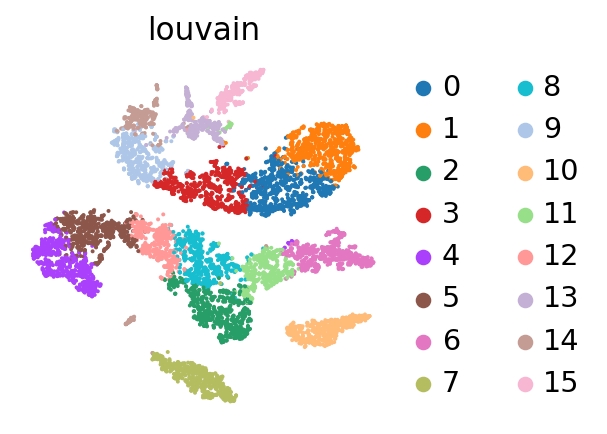

In [14]:
adata = anndata.AnnData(humnmf[1])
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X', random_state=0)
sc.tl.louvain(adata, resolution=1.1)
sc.tl.tsne(adata,use_rep='X',random_state=0)
sc.pl.tsne(adata,color='louvain')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 18 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:02)
computing tSNE
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:27)


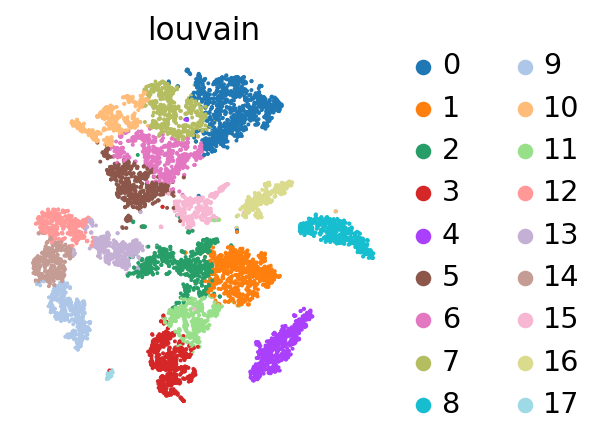

In [15]:
adata = anndata.AnnData(humnmf[2])
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X', random_state=0)
sc.tl.louvain(adata, resolution=1.1)
sc.tl.tsne(adata,use_rep='X',random_state=0)
sc.pl.tsne(adata,color='louvain')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 17 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:02)
computing tSNE
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:28)


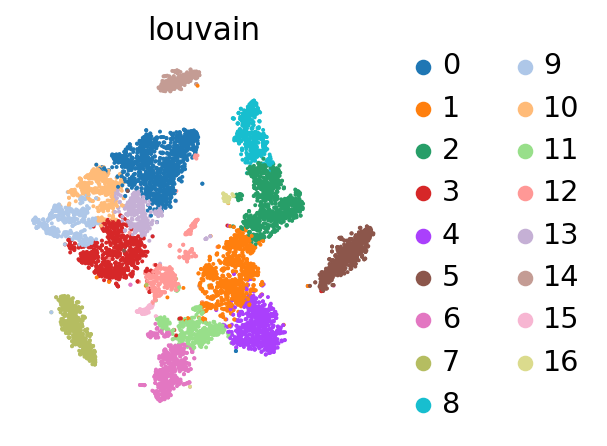

In [16]:
adata = anndata.AnnData(humnmf[5])
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X', random_state=0)
sc.tl.louvain(adata, resolution=1.1)
sc.tl.tsne(adata,use_rep='X',random_state=0)
sc.pl.tsne(adata,color='louvain')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 17 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:02)
computing tSNE
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:28)


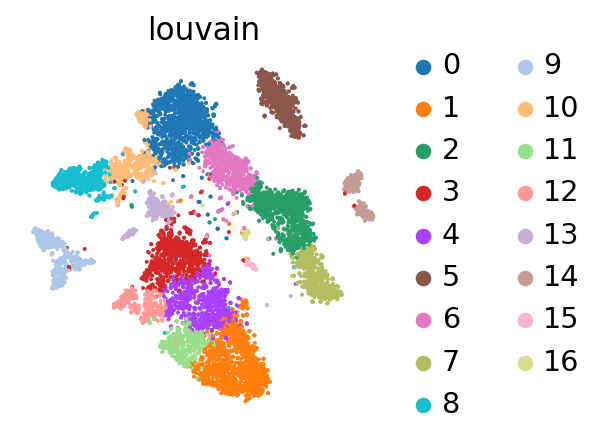

In [17]:
adata = anndata.AnnData(humnmf[11])
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X', random_state=0)
sc.tl.louvain(adata, resolution=1.1)
sc.tl.tsne(adata,use_rep='X',random_state=0)
sc.pl.tsne(adata,color='louvain')

# Transfer

In [3]:
mounmf = pd.read_pickle('../3/6 Hs_mou_0902')
humdata = np.load('../3/5 x_hum_0902_anno_nn.npz', allow_pickle=True)
x_hum = humdata['x'].item().toarray()
y_hum = humdata['y']-1
hum_adata = sc.read_h5ad('../2/3 clustered_hum_0831_anno.h5ad')

/home/lh3n19/.conda/envs/my/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:30)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:03)
computing tSNE
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:29)


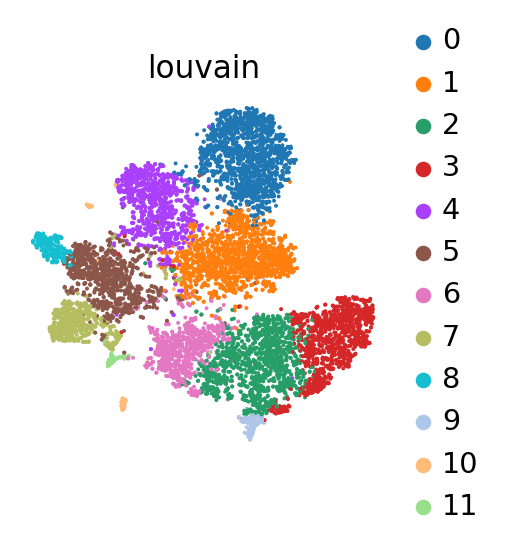

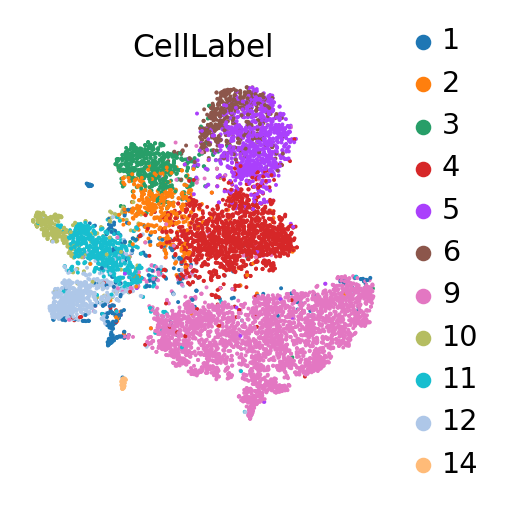

In [4]:
adata = anndata.AnnData(x_hum @ np.linalg.pinv(mounmf[1]))
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X', random_state=0)
sc.tl.louvain(adata, resolution=1.1)
sc.tl.tsne(adata,use_rep='X',random_state=0)
sc.pl.tsne(adata,color='louvain')
adata.obs['CellLabel'] = hum_adata.obs['CellLabel']
sc.pl.tsne(adata,color='CellLabel')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:02)
computing tSNE
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:29)


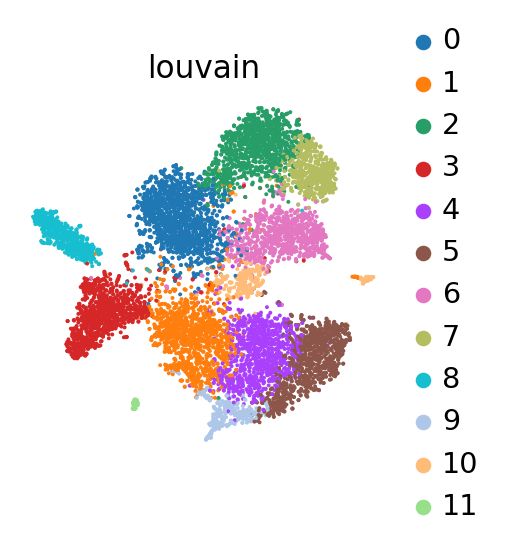

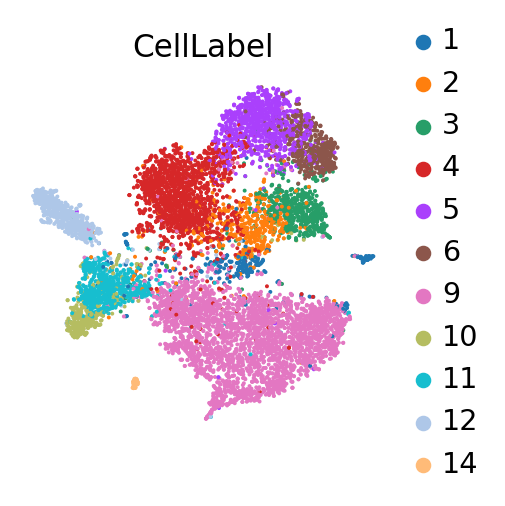

In [5]:
adata = anndata.AnnData(x_hum @ np.linalg.pinv(mounmf[2]))
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X', random_state=0)
sc.tl.louvain(adata, resolution=1.1)
sc.tl.tsne(adata,use_rep='X',random_state=0)
sc.pl.tsne(adata,color='louvain')
adata.obs['CellLabel'] = hum_adata.obs['CellLabel']
sc.pl.tsne(adata,color='CellLabel')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)
computing tSNE
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:32)


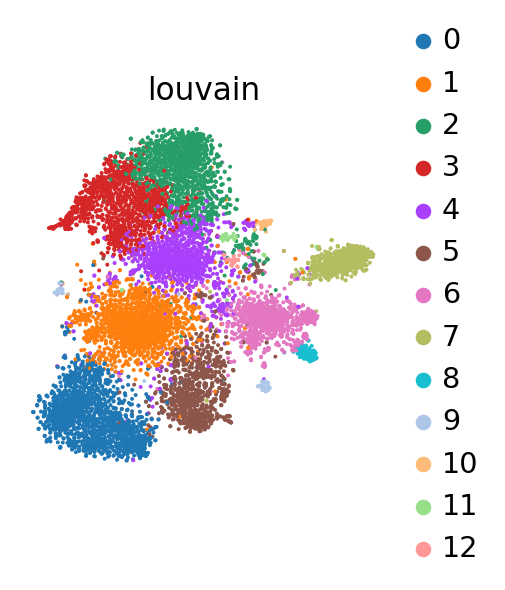

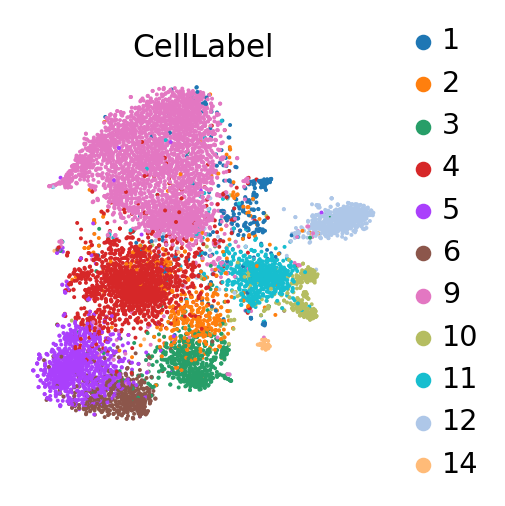

In [6]:
adata = anndata.AnnData(x_hum @ np.linalg.pinv(mounmf[5]))
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X', random_state=0)
sc.tl.louvain(adata, resolution=1.1)
sc.tl.tsne(adata,use_rep='X',random_state=0)
sc.pl.tsne(adata,color='louvain')
adata.obs['CellLabel'] = hum_adata.obs['CellLabel']
sc.pl.tsne(adata,color='CellLabel')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)
computing tSNE
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:34)


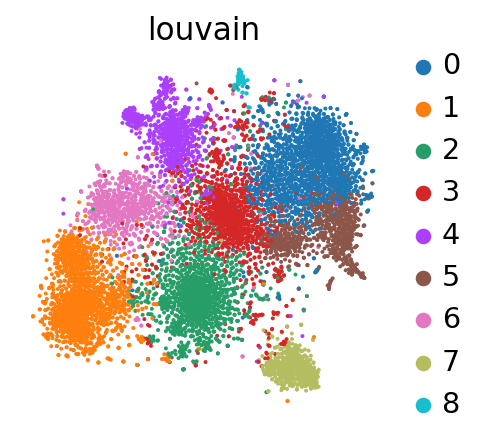

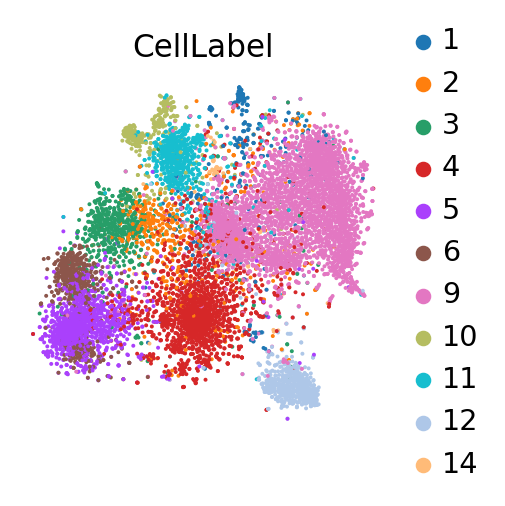

In [7]:
adata = anndata.AnnData(x_hum @ np.linalg.pinv(mounmf[11]))
sc.pp.neighbors(adata, n_neighbors=30, use_rep='X', random_state=0)
sc.tl.louvain(adata, resolution=1.1)
sc.tl.tsne(adata,use_rep='X',random_state=0)
sc.pl.tsne(adata,color='louvain')
adata.obs['CellLabel'] = hum_adata.obs['CellLabel']
sc.pl.tsne(adata,color='CellLabel')